In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
plt.style.use('ggplot')
plt.style.use('bmh')

In [3]:
plt.rcParams['figure.figsize'] = (10, 7) #largura e altura

In [4]:
def linear_regression(num_it, alpha, theta):
    err = np.zeros(num_it)
    for i in range(num_it):
        h = np.dot(X,theta)
        e = h-y
        J = (np.dot(e.T,e)/(2*m))
        err[i] = J
        theta = theta - ((alpha/m)*np.dot(X.T,e))
    return err, theta

In [5]:
x = np.loadtxt('../inputs/entradas_x.txt')
y = np.loadtxt('../inputs/saidas_y.txt')
m = len(x)
x = x.reshape(m,1)
y = y.reshape(m,1)

X = np.ones((len(x),2))
X[:,-1:] = x
initial_theta = np.array([0,0]).reshape(2,1)

NUM_IT = 100

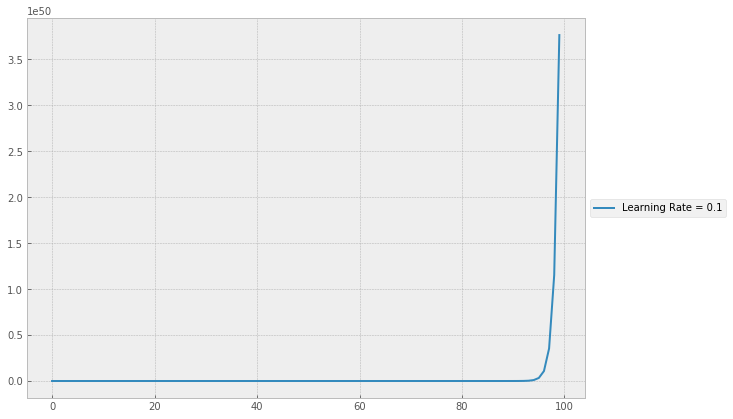

In [7]:
err, theta = linear_regression(num_it=NUM_IT, alpha=0.1, theta=initial_theta)
plt.plot(range(NUM_IT),err, label='Learning Rate = 0.1')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig(os.path.join('..','imgs/')+'first_insight.pdf', bbox_inches='tight')

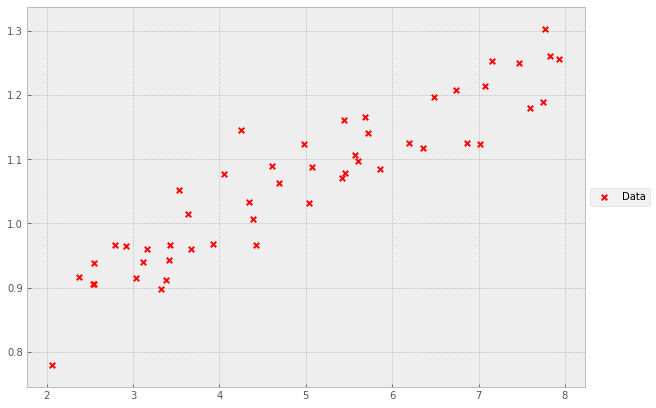

In [8]:
plt.scatter(x,y, label= 'Data', s=30, marker='x', c='r')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig(os.path.join('..','imgs/')+'data.pdf', bbox_inches='tight')

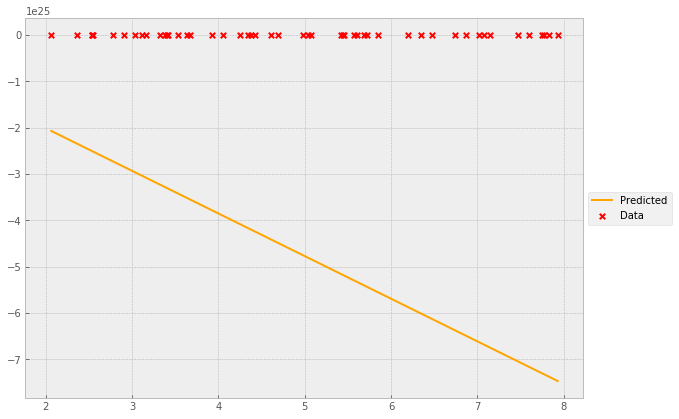

In [9]:
plt.scatter(x,y, label= 'Data', s=30, marker='x', c='r')
plt.plot(x, [theta[0]+(theta[1]*i) for i in x], label= 'Predicted', c='orange')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig(os.path.join('..','imgs/')+'first_predicted.pdf', bbox_inches='tight')

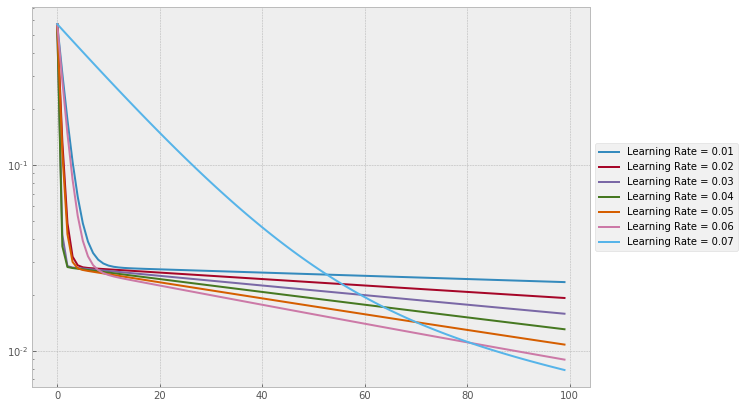

In [10]:
# plt.xscale('log')
plt.yscale('log')

alpha = 0.01
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

alpha = 0.02
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

alpha = 0.03
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

alpha = 0.04
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

alpha = 0.05
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

alpha = 0.06
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

alpha = 0.07
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

#A PARTIR DO 0.08 JA ESTOURA

# alpha = 0.08
# err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
# plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

# alpha = 0.09
# err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
# plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

# alpha = 0.1
# err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
# plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


# Valores mínimos - 100 IT

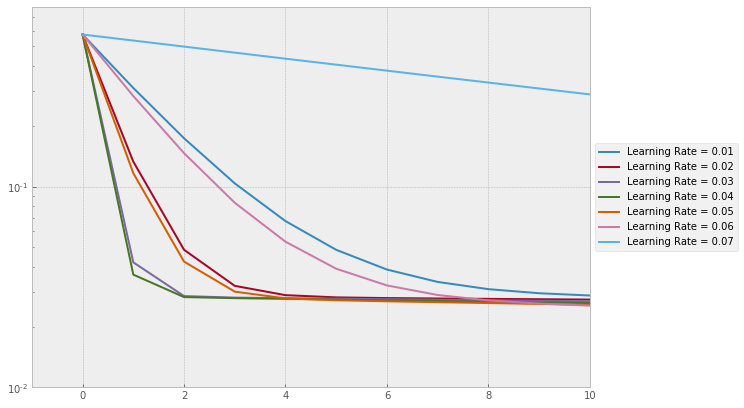

In [28]:
# plt.xscale('log')
plt.yscale('log')

alpha = 0.01
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}', alpha=1,)

alpha = 0.02
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}', alpha=1,)

alpha = 0.03
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}', alpha=1,)

alpha = 0.04
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}', alpha=1,)

alpha = 0.05
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}', alpha=1,)

alpha = 0.06
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}', alpha=1,)

alpha = 0.07
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}', alpha=1,)

#A PARTIR DO 0.08 JA ESTOURA

# alpha = 0.08
# err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
# plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

# alpha = 0.09
# err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
# plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

# alpha = 0.1
# err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
# plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

plt.axis(xmin=-1,xmax=10,ymin=10e-3)
# plt.axis(xmax=10)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


# Valores máximos - 100 IT

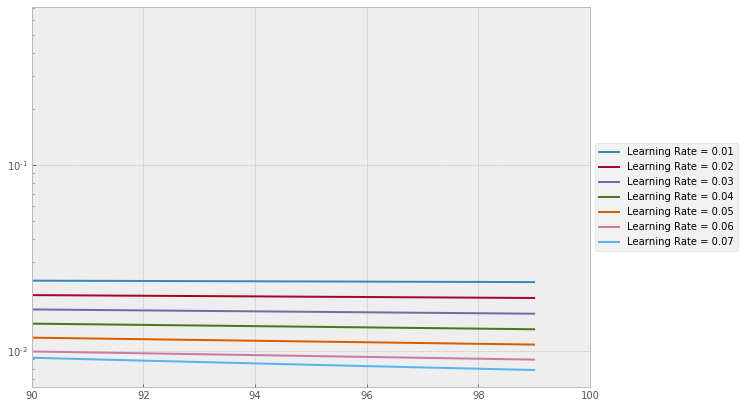

In [14]:
# plt.xscale('log')
plt.yscale('log')

alpha = 0.01
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}', alpha=1)

alpha = 0.02
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}', alpha=1)

alpha = 0.03
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}', alpha=1)

alpha = 0.04
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}', alpha=1)

alpha = 0.05
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}', alpha=1)

alpha = 0.06
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}', alpha=1)

alpha = 0.07
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}', alpha=1)

#A PARTIR DO 0.08 JA ESTOURA

# alpha = 0.08
# err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
# plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

# alpha = 0.09
# err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
# plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

# alpha = 0.1
# err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
# plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

plt.axis(xmin=90)
plt.axis(xmax=100)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


---

# Learning Rate - 1000 IT

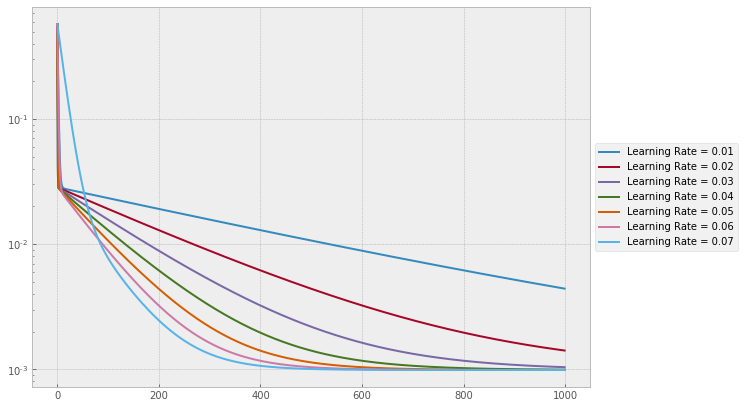

In [15]:
# plt.xscale('log')
plt.yscale('log')
NUM_IT = 1000

alpha = 0.01
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

alpha = 0.02
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

alpha = 0.03
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

alpha = 0.04
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

alpha = 0.05
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

alpha = 0.06
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

alpha = 0.07
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

#A PARTIR DO 0.08 JA ESTOURA

# alpha = 0.08
# err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
# plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

# alpha = 0.09
# err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
# plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

# alpha = 0.1
# err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
# plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Valores máximos - 1000 IT

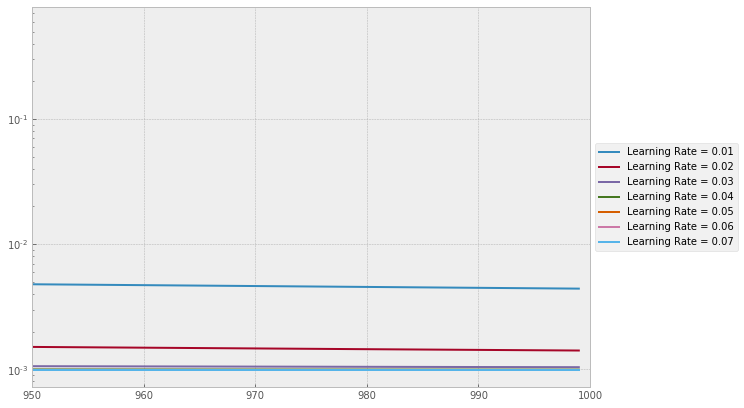

In [36]:
# plt.xscale('log')
plt.yscale('log')

alpha = 0.01
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

alpha = 0.02
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

alpha = 0.03
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

alpha = 0.04
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

alpha = 0.05
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

alpha = 0.06
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

alpha = 0.07
err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

#A PARTIR DO 0.08 JA ESTOURA

# alpha = 0.08
# err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
# plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

# alpha = 0.09
# err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
# plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

# alpha = 0.1
# err, _ = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
# plt.plot(range(NUM_IT),err, label=f'Learning Rate = {alpha}')

plt.axis(xmin=950)
plt.axis(xmax=1000)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


In [30]:
alpha = 0.07
_, new_theta = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)

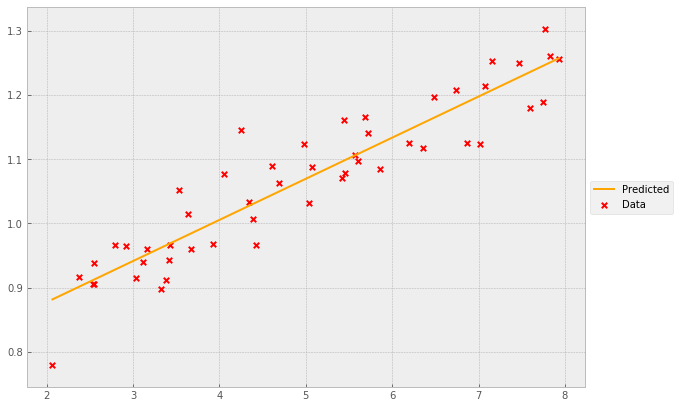

In [32]:
plt.scatter(x,y, label= 'Data', s=30, marker='x', c='r')
plt.plot(x, [new_theta[0]+(new_theta[1]*i) for i in x], label= 'Predicted', c='orange')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig(os.path.join('..','imgs/')+'FINAL_predicted.pdf', bbox_inches='tight')